In [30]:
%%bash
pip install pandas-datareader

In [31]:
pip show scikit-learn # to see which version and where scikit-learn is installed

Name: scikit-learn
Version: 0.23.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Users/augustguo/opt/anaconda3/lib/python3.7/site-packages
Requires: threadpoolctl, scipy, numpy, joblib
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/augustguo/opt/anaconda3/lib/python3.7/site-packages (0.23.1)
Note: you may need to restart the kernel to use updated packages.


In [33]:
!conda install -c conda-forge keras --yes

Solving environment: done

# All requested packages already installed.



In [34]:
import math
import pandas_datareader.data as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
# Define the instruments to download. We would like to see Apple, Microsoft.
company_list = ['AAPL']

start_date = '2020-01-01'
end_date = '2020-6-06'

df = web.DataReader('GNUS', 'yahoo', start_date, end_date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,0.310,0.275,0.300,0.285,1032200,0.285
2020-01-03,0.294,0.260,0.280,0.270,557700,0.270
2020-01-06,0.408,0.265,0.280,0.370,4131900,0.370
2020-01-07,0.380,0.280,0.379,0.360,1415400,0.360
2020-01-08,0.349,0.304,0.340,0.335,514300,0.335
...,...,...,...,...,...,...
2020-06-01,2.680,2.330,2.390,2.620,47753600,2.620
2020-06-02,4.050,2.910,3.080,4.020,185150900,4.020
2020-06-03,8.000,4.760,4.950,7.930,409160100,7.930


In [36]:
#get the numbers of rows and columns in the dataframe
df.shape

(108, 6)

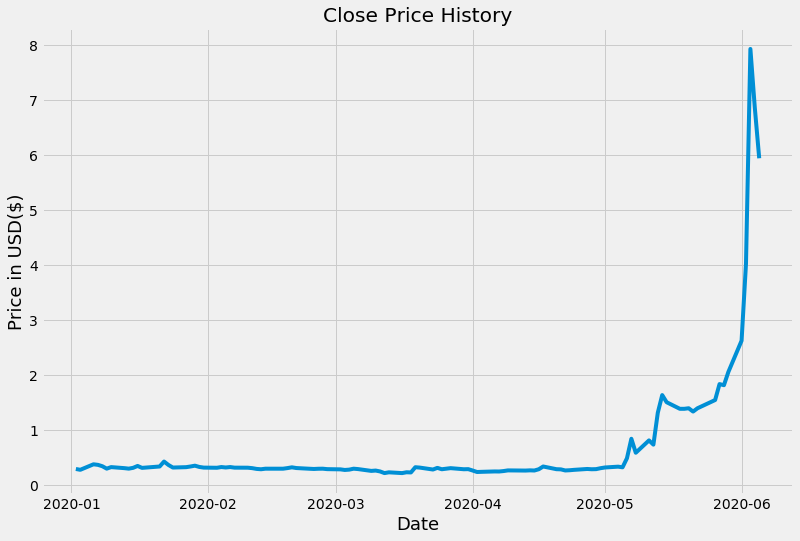

In [37]:
#visualize the closing price history 
plt.figure(figsize=(12, 8))
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price in USD($)', fontsize=18)
plt.plot(df['Close'])

In [38]:
#create a new dataframe with only the close column 

data = df.filter(['Close'])
data.head()

# df.loc[:, ['Close']] will do the same

,Close
Date,
2020-01-02,0.285
2020-01-03,0.270
2020-01-06,0.370
2020-01-07,0.360
2020-01-08,0.335


In [39]:
#convert the dataframe to numpy array
dataset = data.values

In [40]:
# get the number of columns to train the model on

training_data_len = math.ceil(len(dataset) * .8)
training_data_len

87

In [41]:
#scale the data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [42]:
# create training dataset

train_data = scaled_data[0:training_data_len, 0]

In [43]:
# split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])
    
    #get a look what x_train and y_train look like
    if i <=61:
        print(x_train)
        print(y_train)
        print('')

[array([0.00971503, 0.00777202, 0.02072539, 0.01943005, 0.01619171,
       0.01049223, 0.01411917, 0.01165803, 0.01049223, 0.01243523,
       0.01683938, 0.0123057 , 0.01554404, 0.02720207, 0.01917099,
       0.0130829 , 0.01398964, 0.01554404, 0.01748705, 0.01450777,
       0.01295337, 0.01256477, 0.0142487 , 0.01321244, 0.0142487 ,
       0.01282383, 0.0126943 , 0.01165803, 0.00984456, 0.00906736,
       0.01036269, 0.01036269, 0.01178757, 0.01360104, 0.0119171 ,
       0.01023316, 0.00971503, 0.01023316, 0.01036269, 0.00932643,
       0.00880829, 0.00738342, 0.00816062, 0.01036269, 0.00945596,
       0.00518135, 0.00595855, 0.00388601, 0.        , 0.00181347,
       0.        , 0.00194301, 0.00155441, 0.0138601 , 0.01295337,
       0.00841969, 0.0123057 , 0.00906736, 0.01036269, 0.01165803])]
[0.009067358710578868]

[array([0.00971503, 0.00777202, 0.02072539, 0.01943005, 0.01619171,
       0.01049223, 0.01411917, 0.01165803, 0.01049223, 0.01243523,
       0.01683938, 0.0123057 , 0.0

In [44]:
# convert x_train and y_train into numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train.shape

(27, 60)

In [46]:
# reshape the data to be 3 dimensional for LSTM training as LST expect the shape as (sample#, times_step, #features)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(27, 60, 1)

In [47]:
# built LSTM model 

model = Sequential()

# add first neural network layer with 50 neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))

# add second neural network layer with 50 neurons 
model.add(LSTM(50, return_sequences=False))

# add a dense layer with 25 neurons 
model.add(Dense(25))

# add last dense layer with 1 neuron
model.add(Dense(1))

In [48]:
# compile the model 
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [49]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
27/27 [==============================] - 3s 118ms/step - loss: 6.3112e-05


In [50]:
# create testing data set
# Create a new array containing scaled values from index 1543 to 2003

test_data = scaled_data[training_data_len - 60:, :]

In [51]:
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [52]:
# convert the data into numpy array for LSTM model

x_test = np.array(x_test)

In [53]:
# reshape the array for LSTM model

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# get the model predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [54]:
# get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

1.8885057398251124

In [55]:
# plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

valid

/Users/augustguo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Predictions
Date,,
2020-05-07,0.835,0.357133
2020-05-08,0.580,0.362079
2020-05-11,0.805,0.366470
2020-05-12,0.728,0.371867
2020-05-13,1.310,0.376756
2020-05-14,1.630,0.385416
2020-05-15,1.500,0.397962
2020-05-18,1.380,0.410590
2020-05-19,1.380,0.421170


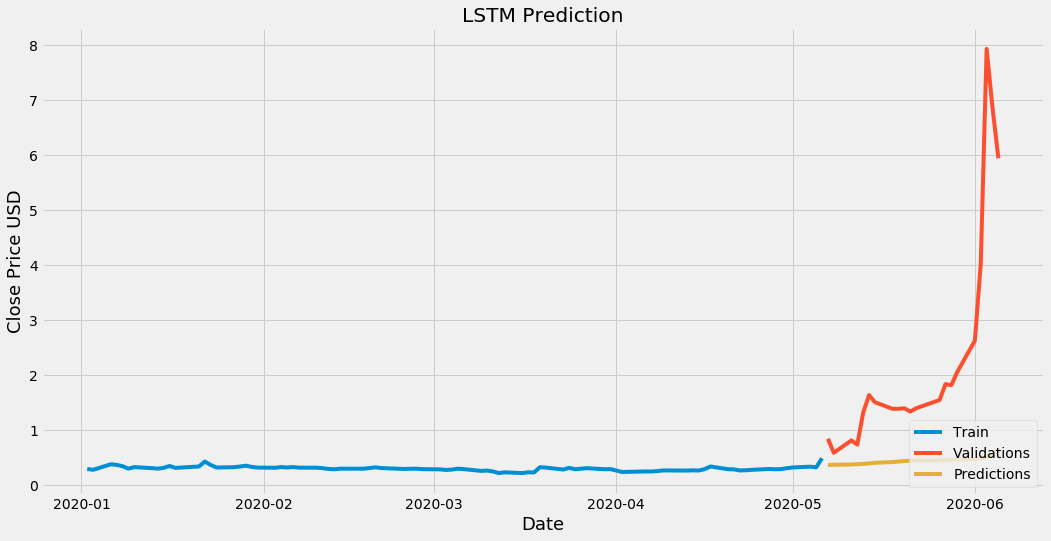

In [56]:
# visualize the data 
plt.figure(figsize=(16, 8))
plt.title('LSTM Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validations', 'Predictions'], loc='lower right')